In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df['Twice'] = df['bmi'].apply(lambda x: x*2 if x>20 else x)

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Upper,Twice
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,PRIVATE,73.2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,SELF-EMPLOYED,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,PRIVATE,65.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,PRIVATE,68.8
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,SELF-EMPLOYED,48.0


Each year, about 795,000 people in the United States have strokes, and of these incidents, 137,000 of the people die. About 610,000 of these cases are first strokes, and 185,000 people who survive a stroke will have another stroke within 5 years.

Ischemic strokes make up about 87% of all strokes. Hemorrhagic strokes make up the remaining 13%.

Stroke is a leading cause of death and disability in the United States. People of all ages and backgrounds can have a stroke. However, some demographic factors put certain people at higher risk of stroke or death from stroke. These include:

Race/ethnicity. African Americans have almost two times the risk of white people of having a first stroke. Hispanic Americans and American Indian/Alaska Natives are at greater risk than whites are for having a stroke but are at less risk than African Americans. African Americans and Hispanics are more likely than whites to die after having a stroke.

Age. Stroke risk increases with age. Three-quarters of strokes occur in people ages 65 and older.

Geography. The highest U.S. death rates from stroke occur in the southeastern United States.

Gender. Men are more likely than women to have a stroke.

Certain lifestyle factors and conditions also increase the risk for stroke. The most important of these include:

High blood pressure

Diabetes

Heart disease (such as atrial fibrillation)

Previous stroke or transient ischemic attack

Cigarette smoking

Additional risk factors include:

Physical inactivity

Overweight or obesity

High cholesterol

Sickle cell disease

Drinking too much alcohol

Family history of stroke

Drug abuse

Genetic conditions, such as blood-clotting or vascular disorders (for example, Factor V Leiden or CADASIL)

Certain medications (such as hormonal birth control pills)

Being pregnant

Menopause

Lesser risk factors include:

Head and neck injuries

Recent viral or bacterial infections

Amplification of risk occurs when a person has more than one of the risk factors listed above. This means that the combined risk of two or more risk factors is greater than simply adding their effects.1,2

have overweight or obesity

are 55 years of age or older

have a personal or family history of stroke

have high blood pressure

have diabetes

have high cholesterol

have heart disease, carotid artery disease, or another vascular disease

are sedentary

consume alcohol excessively

smoke

use illicit drugs

In [7]:
df.shape

(5110, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
c

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

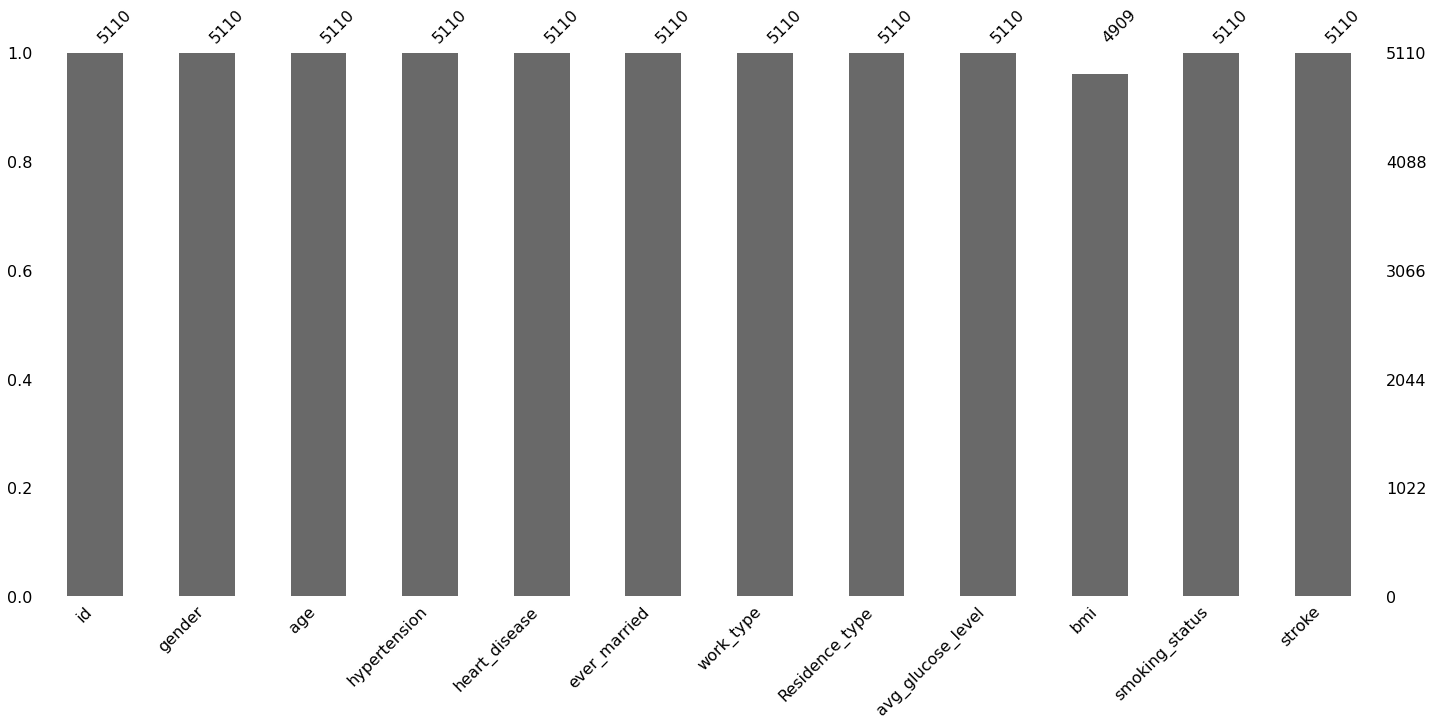

In [11]:
msno.bar(df)

Here we are seeing that 7 Categorical features.So  let's start the EDA with those features. 

Text(0.5, 0.98, 'Features distribution based on Stroke ')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


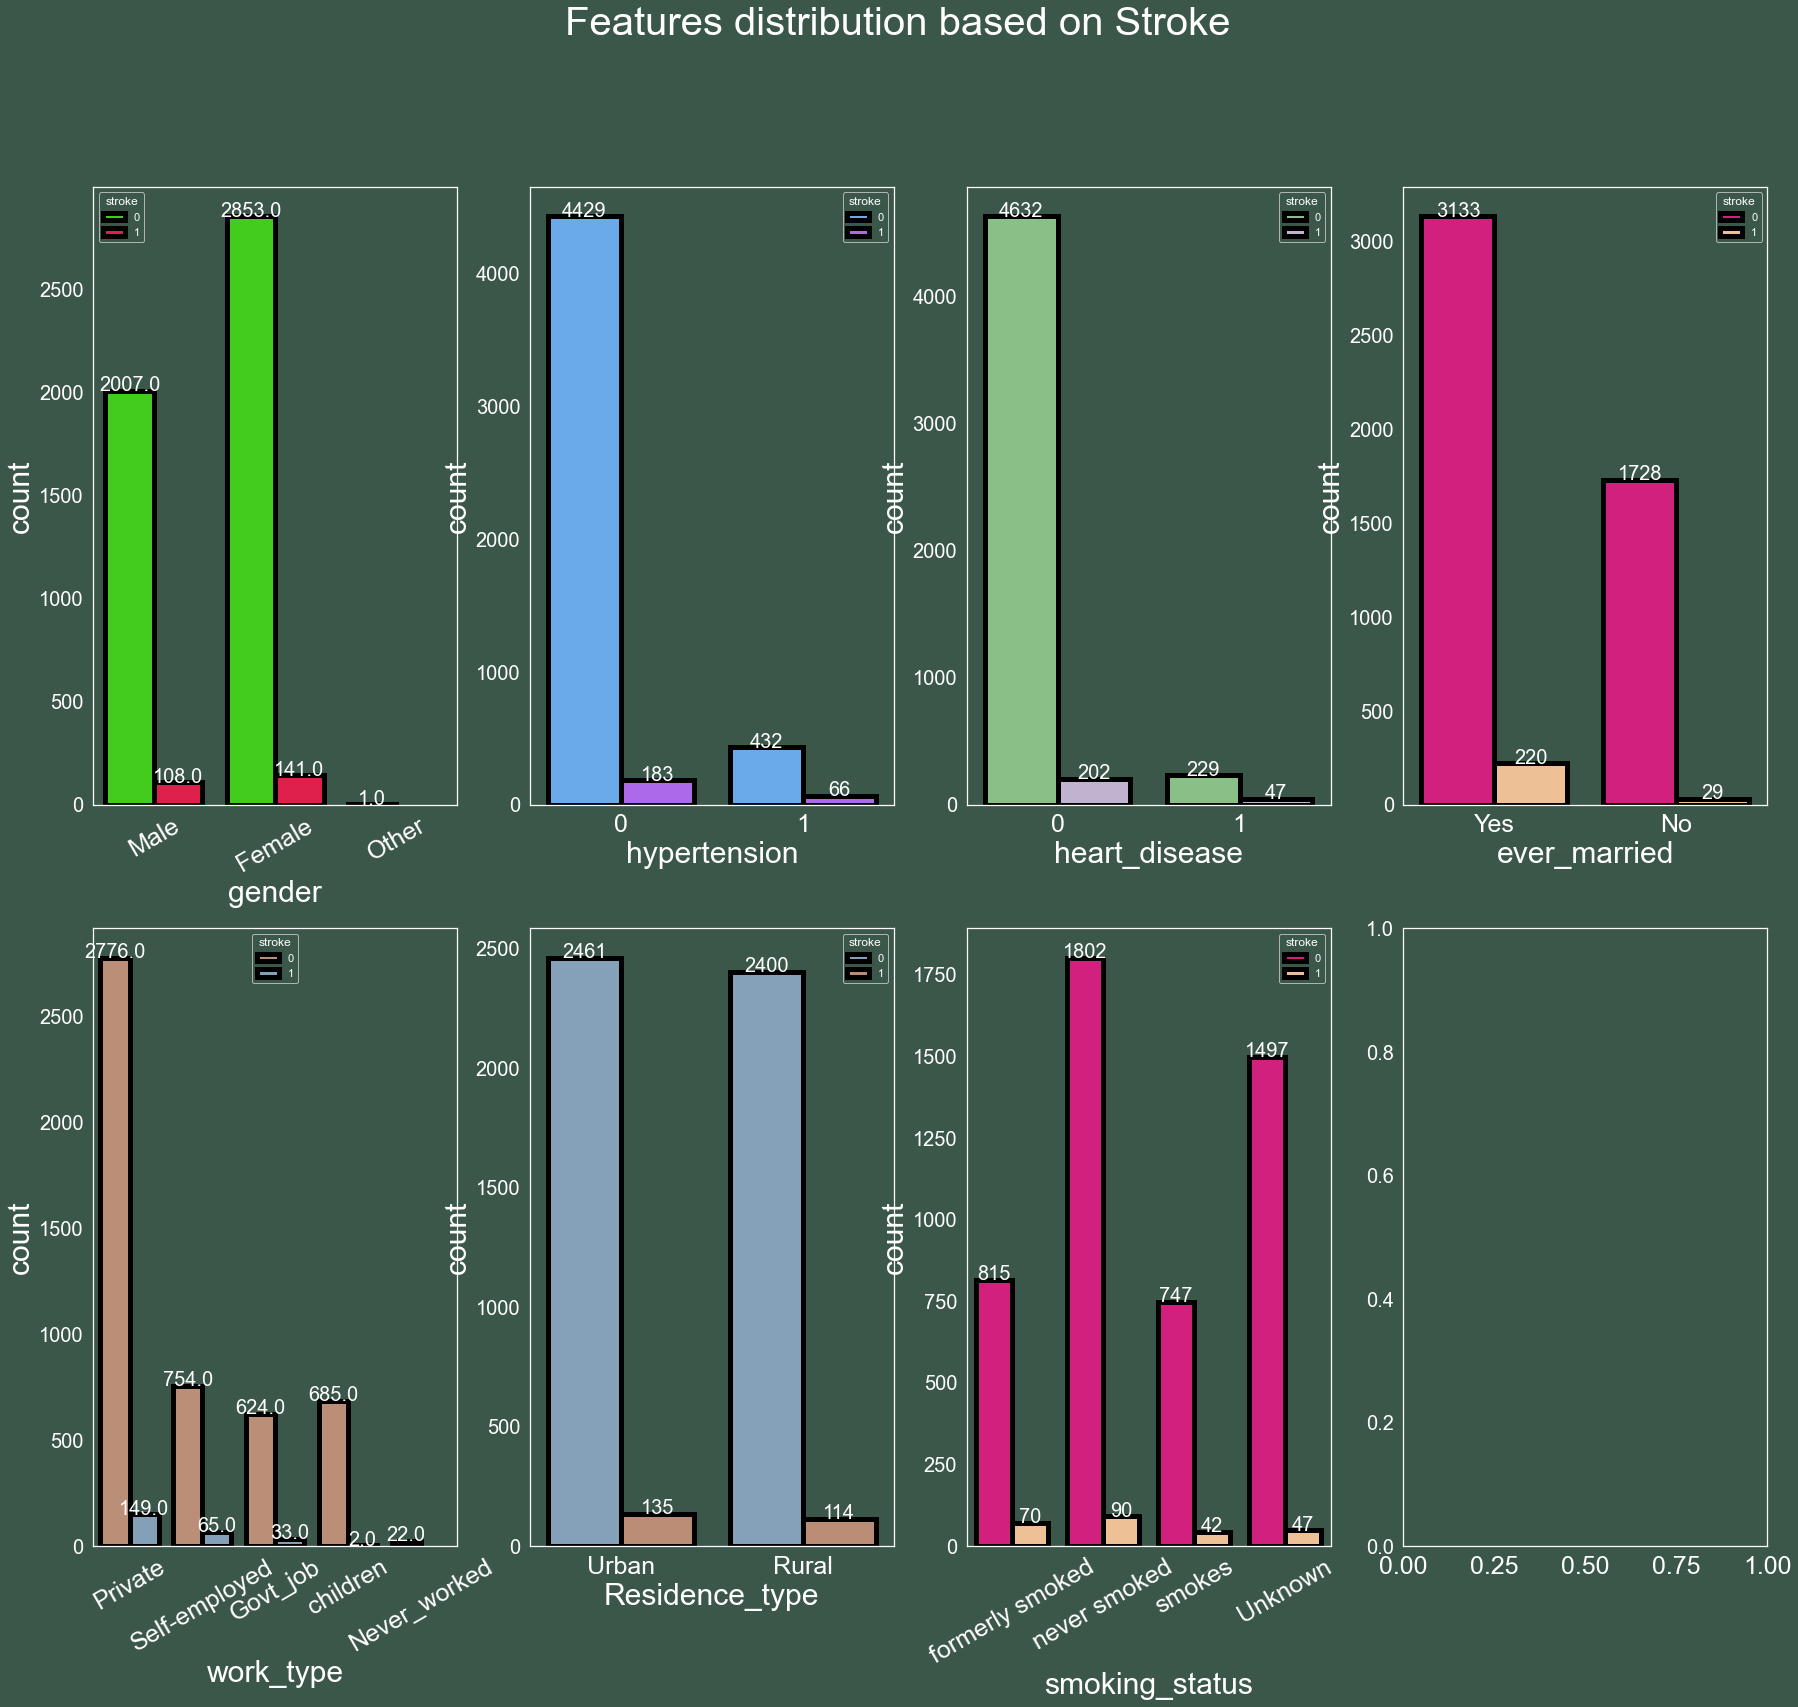

In [12]:
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.family'] = "cursive"
bg_color = (.23,.34,.29)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

#hypertension	heart_disease	ever_married	work_type	Residence_type	smoking_status
#sns.set(font_scale=1.25, style='darkgrid', palette='PuBuGn_r',)
f, axes = plt.subplots(2,4, figsize=(30,25))

ax = sns.countplot(data=df,
                  x = 'gender',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="prism",ax=axes[0,0]
                  )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax1 = sns.countplot(data=df,
                  x = 'hypertension',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="cool",ax=axes[0,1]
                  )
for rect in ax1.patches:
    ax1.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax2 = sns.countplot(data=df,
                  x = 'heart_disease',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="Accent",ax=axes[0,2]
                  )
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)
   
ax3 = sns.countplot(data=df,
                  x = 'ever_married',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="Accent_r",ax=axes[0,3]
                  )
for rect in ax3.patches:
    ax3.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)
   

ax4 = sns.countplot(data=df,
                  x = 'work_type',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="twilight_shifted_r",ax=axes[1,0]
                  )
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=30)
for rect in ax4.patches:
    ax4.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax5 = sns.countplot(data=df,
                  x = 'Residence_type',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="twilight_shifted",ax=axes[1,1]
                  )
for rect in ax5.patches:
    ax5.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax6 = sns.countplot(data=df,
                  x = 'smoking_status',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="Accent_r",ax=axes[1,2]
                  )
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=30)
for rect in ax6.patches:
    ax6.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)
   
f.suptitle('Features distribution based on Stroke ',fontsize=40)

Here we cann't compare category of each features among them, because they are not same in number.So we 
have to calculate the ratio.

In [13]:
(29/1728)

0.01678240740740741

In [14]:
66/432

0.1527777777777778

Make Observations:
    
    Gender:
        
1. Male = (108+2007) = .054 and Female = (141/2853) = .045 

2. Male has more porne to Stroke

    Hypertension:
        
1. No =((183/4429)) =.0413 and Yes = 66/432 = .152

2. This clearly shows that people with hypertension are more porne to stroke.054

    Heart Disease:
        
1. No = ((202/4632)) = .044 and Yes = (47./229) = .20

2. This also shows people having heart disease are more porne to stroke.054

    Married:
        
1. Yes = (220/3133) = .07 NO = (29/1728) = 0.016

2. It indaicates Unmarried people are safer then then married.

Text(0.5, 0.98, 'Numerical Features distribution')

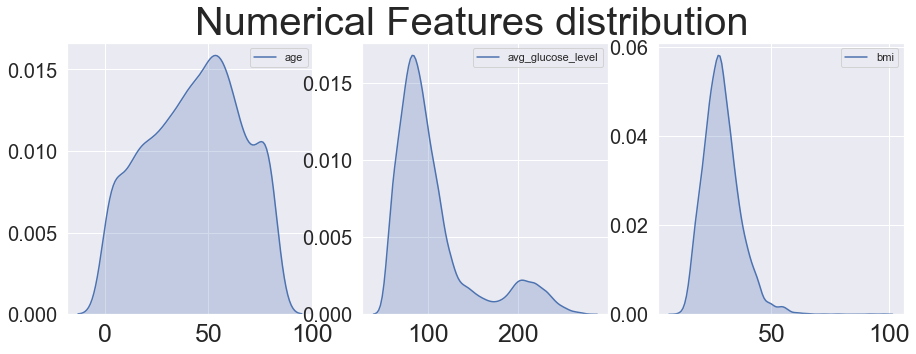

In [15]:
#Let's analyze the Numerical Columns.

sns.set_style(style = 'darkgrid')
f, axes = plt.subplots(1,3, figsize = (15,5))

sns.kdeplot(df['age'],shade = True ,ax=axes[0])
sns.kdeplot(df['avg_glucose_level'],shade = True ,ax=axes[1])
sns.kdeplot(df['bmi'],shade = True ,ax=axes[2])
f.suptitle('Numerical Features distribution',fontsize=40)



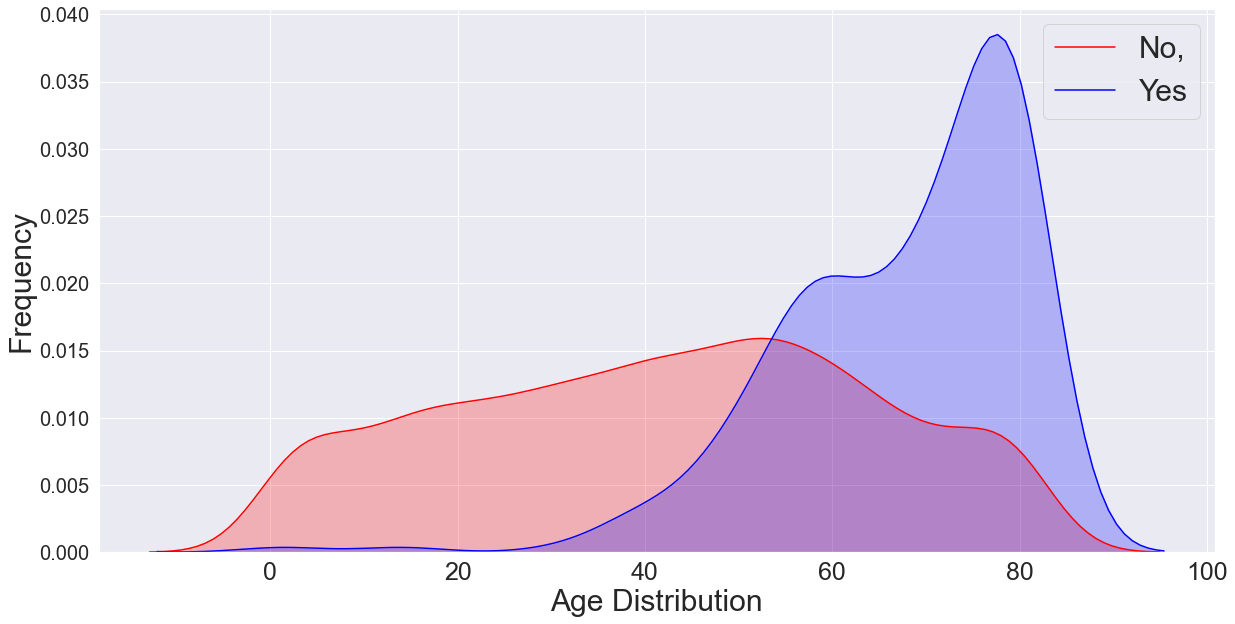

In [16]:
g = sns.kdeplot(df['age'][(df["stroke"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['age'][(df["stroke"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Age Distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

Observations:
    
1.People do have stroke mostly are Old and ranging from around 60 to 100 

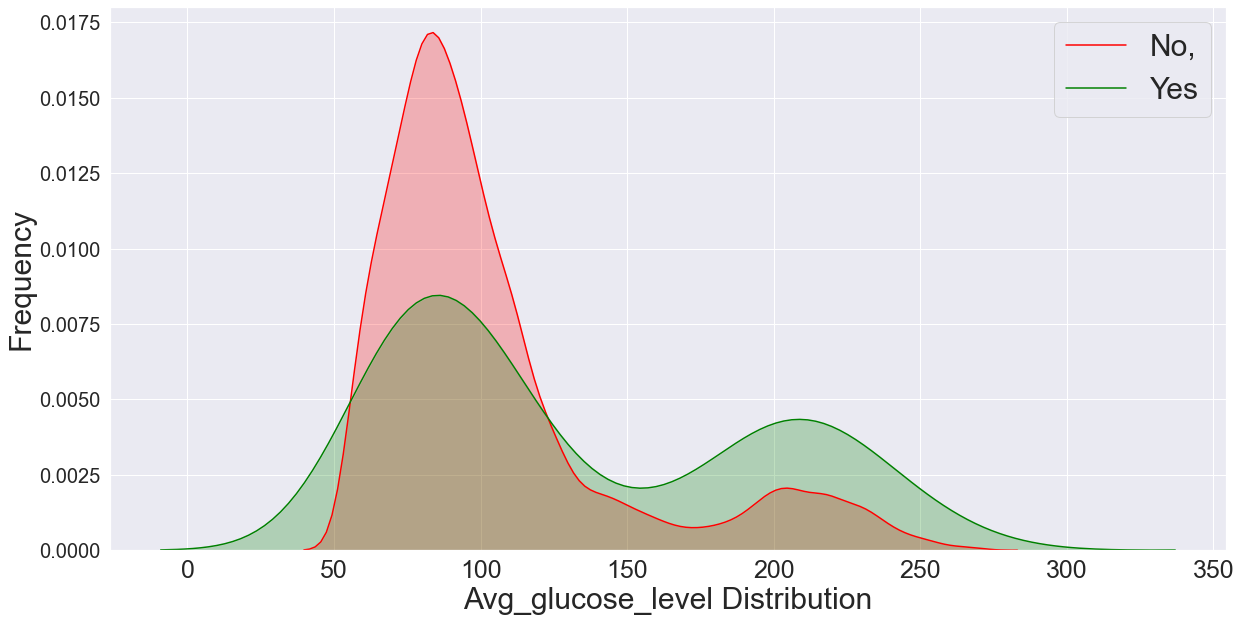

In [17]:
g = sns.kdeplot(df['avg_glucose_level'][(df["stroke"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['avg_glucose_level'][(df["stroke"] == 1)], ax =g, color="Green", shade= True)
g.set_xlabel('Avg_glucose_level Distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

Obserbations:
    
1. People have stroke having avg_glucose_level around 100 and 200.

2. People  don't have stroke having avg_glucose_level around 75.


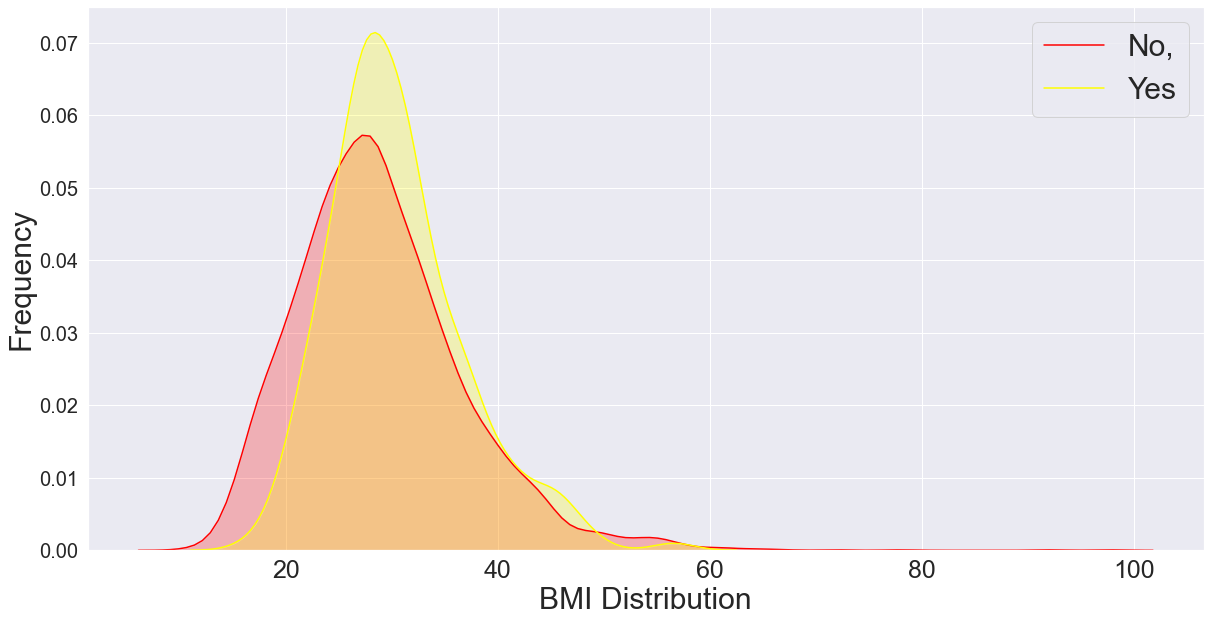

In [18]:
sns.set_palette(palette = 'YlGn')
g = sns.kdeplot(df['bmi'][(df["stroke"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['bmi'][(df["stroke"] == 1)], ax =g, color="Yellow", shade= True)
g.set_xlabel('BMI Distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

In [27]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

Relation between the Numerical features.

In [45]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [48]:
df['age'] = df['age'].astype(int)

In [49]:
type(df['age'])

pandas.core.series.Series

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: Could not interpret input 'bmi'

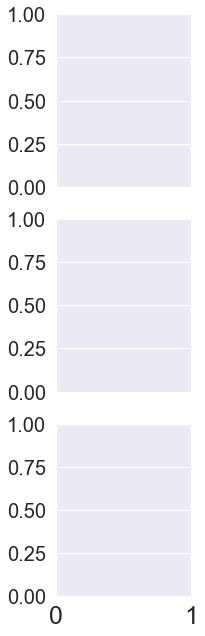

In [50]:
g = sns.FacetGrid(df, row = 'gender')
g.map(sns.boxenplot, x = 'bmi')

In [3]:
sns.__version__

'0.10.1'

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
df.dropna(inplace = True)

In [26]:
df = pd.get_dummies(df,
                    columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],
                    drop_first=True)

In [29]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


In [31]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

posx and posy should be finite values
posx and posy should be finite values


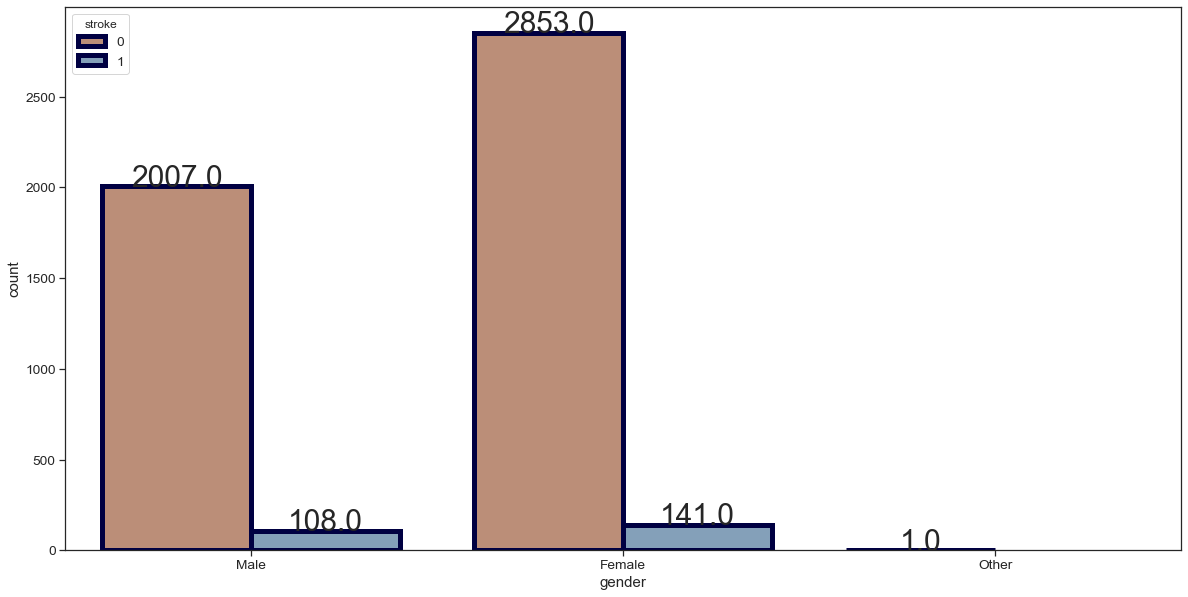

In [74]:
sns.set(style="ticks",font_scale=1.25)
#sns.set_style({'font.family': 'Helvetic'})
hypertension	heart_disease	ever_married	work_type	Residence_type	smoking_status

ax = sns.countplot(data=df,
                  x = 'gender',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0.26),
                  linewidth=5,
                  palette="twilight_shifted_r")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 30)


In [ ]:
#Subplot
f, axes = plt.subplots(1, 3, figsize=(5,5))
    sns.despine()
    DIET_df=df.loc[df['Group'] == 'DIET']
    MOD_df=df.loc[df['Group'] == 'MOD-PA']
    HIGH_df=df.loc[df['Group'] == 'HIGH-PA']
    ax = sns.countplot(x='Group', hue='Sex', data=DIET_df, palette= ["#7fcdbb",                 "#edf8b1"], ax=axes[0])
    ax1=sns.countplot(x='Group', hue='Sex', data=MOD_df, palette=["#fc9272",         "#fee0d2"], ax=axes[1])
    ax1.set(yticklabels=[])
    ax1.set_yticks([])
    ax1.set(ylabel=' ')
    ax1.spines["left"].set_visible(False)
    ax2=sns.countplot(x='Group', hue='Sex', data=HIGH_df, palette=["#bcbddc", "#efedf5"], ax=axes[2])
    ax2.set(yticklabels=[])
    ax2.set(ylabel=' ')
    ax2.set_yticks([])
    ax2.spines["left"].set_visible(False)

In [ ]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
)

In [ ]:
#countour
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=df.sepal_width, y=df.sepal_length)
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Blues", shade=True, thresh=0)
plt.show()
